In [1]:
import warnings
warnings.filterwarnings("ignore")

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

## Скачиваем и обрабатываем данные

In [8]:
df = pd.read_csv('./market_data_train.csv')
df

,symbol,time,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume
0,1INCH,2020-12-25 06:00:00,0.2000,3.0885,0.2000,2.5826,6.707592e+07,48768,3.553052e+07,1.724763e+07
1,1INCH,2020-12-25 07:00:00,2.5824,2.6900,2.2249,2.5059,6.508385e+07,31099,2.244087e+07,9.861481e+06
2,1INCH,2020-12-25 08:00:00,2.5152,2.8870,2.3609,2.6237,6.814338e+07,33001,2.130043e+07,1.160785e+07
3,1INCH,2020-12-25 09:00:00,2.6318,2.8247,2.4650,2.6134,6.787587e+07,30459,1.749181e+07,9.087566e+06
4,1INCH,2020-12-25 10:00:00,2.6104,2.7498,2.5629,2.6365,6.847583e+07,21023,9.919400e+06,4.798067e+06
...,...,...,...,...,...,...,...,...,...,...
2235079,ZRX,2021-05-31 16:00:00,0.9755,1.0160,0.9731,1.0149,8.544659e+08,1745,5.283764e+05,2.847624e+05
2235080,ZRX,2021-05-31 17:00:00,1.0147,1.0200,0.9871,1.0047,8.458783e+08,1451,3.980687e+05,1.617346e+05
2235081,ZRX,2021-05-31 18:00:00,1.0064,1.0077,0.9830,0.9884,8.321549e+08,894,2.268356e+05,7.276305e+04
2235082,ZRX,2021-05-31 19:00:00,0.9889,0.9905,0.9827,0.9865,8.305553e+08,346,7.615435e+04,3.804757e+04


Создадим новый столбец, который будет включать в себя только дату (без времени суток)

In [15]:
import datetime
df['only_date'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S').date() for d in df['time']]

In [16]:
df

,symbol,time,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume,only_date
0,1INCH,2020-12-25 06:00:00,0.2000,3.0885,0.2000,2.5826,6.707592e+07,48768,3.553052e+07,1.724763e+07,2020-12-25
1,1INCH,2020-12-25 07:00:00,2.5824,2.6900,2.2249,2.5059,6.508385e+07,31099,2.244087e+07,9.861481e+06,2020-12-25
2,1INCH,2020-12-25 08:00:00,2.5152,2.8870,2.3609,2.6237,6.814338e+07,33001,2.130043e+07,1.160785e+07,2020-12-25
3,1INCH,2020-12-25 09:00:00,2.6318,2.8247,2.4650,2.6134,6.787587e+07,30459,1.749181e+07,9.087566e+06,2020-12-25
4,1INCH,2020-12-25 10:00:00,2.6104,2.7498,2.5629,2.6365,6.847583e+07,21023,9.919400e+06,4.798067e+06,2020-12-25
...,...,...,...,...,...,...,...,...,...,...,...
2235079,ZRX,2021-05-31 16:00:00,0.9755,1.0160,0.9731,1.0149,8.544659e+08,1745,5.283764e+05,2.847624e+05,2021-05-31
2235080,ZRX,2021-05-31 17:00:00,1.0147,1.0200,0.9871,1.0047,8.458783e+08,1451,3.980687e+05,1.617346e+05,2021-05-31
2235081,ZRX,2021-05-31 18:00:00,1.0064,1.0077,0.9830,0.9884,8.321549e+08,894,2.268356e+05,7.276305e+04,2021-05-31
2235082,ZRX,2021-05-31 19:00:00,0.9889,0.9905,0.9827,0.9865,8.305553e+08,346,7.615435e+04,3.804757e+04,2021-05-31


Создадим новую таблицу A, которая будет иметь агрегированные данные за день, используя groupby для каждой бумаги и даты

In [57]:
A = pd.DataFrame()
temp_open = df.copy()
temp_open = temp_open.groupby(['symbol', 'only_date']).first()['open']
temp_high = df.copy()
temp_high = temp_high.groupby(['symbol', 'only_date']).max()['high']
temp_low = df.copy()
temp_low = temp_low.groupby(['symbol', 'only_date']).min()['low']
temp_close = df.copy()
temp_close = temp_close.groupby(['symbol', 'only_date']).last()['close']
temp_mc = df.copy()
temp_mc = temp_mc.groupby(['symbol', 'only_date']).sum()['market_cap']
temp_tr = df.copy()
temp_tr = temp_tr.groupby(['symbol', 'only_date']).sum()['n_trades']
temp_vol = df.copy()
temp_vol = temp_vol.groupby(['symbol', 'only_date']).sum()['volume']
temp_tbv = df.copy()
temp_tbv = temp_tbv.groupby(['symbol', 'only_date']).sum()['taker_buy_volume']
A['open'] = temp_open
A['high'] = temp_high
A['low'] = temp_low
A['close'] = temp_close
A['market_cap'] = temp_mc
A['n_trades'] = temp_tr
A['volume'] = temp_vol
A['taker_buy_volume'] = temp_tbv
A

open    high     low   close    market_cap  n_trades  \
symbol only_date                                                            
1INCH  2020-12-25  0.2000  3.0885  0.2000  2.1936  1.100153e+09    596566   
       2020-12-26  2.1936  2.4609  1.5717  1.6221  1.141930e+09    314848   
       2020-12-27  1.6206  1.6668  1.0360  1.1001  8.263693e+08    301197   
       2020-12-28  1.1019  1.2787  1.0353  1.0906  1.572571e+09    157507   
       2020-12-29  1.0889  1.1344  0.7541  0.8852  1.556105e+09    164635   
...                   ...     ...     ...     ...           ...       ...   
ZRX    2021-05-27  1.1324  1.1888  1.0225  1.1076  2.262910e+10     36198   
       2021-05-28  1.1078  1.1243  0.9245  0.9421  2.045077e+10     43691   
       2021-05-29  0.9420  1.0089  0.8432  0.8922  1.887528e+10     27272   
       2021-05-30  0.8905  0.9909  0.8421  0.9444  1.893287e+10     22351   
       2021-05-31  0.9431  1.0200  0.8874  0.9988  1.686183e+10     16946   

                         volume  taker_buy_volume  
symbol only_date                                   
1INCH  2020-12-25  2.923449e+08      1.444582e+08  
       2020-12-26  1.132451e+08      5.393879e+07  
       2020-12-27  9.892812e+07      4.747393e+07  
       2020-12-28  4.796362e+07      2.439249e+07  
       2020-12-29  4.745768e+07      2.154755e+07  
...                         ...               ...  
ZRX    2021-05-27  1.049805e+07      5.423639e+06  
       2021-05-28  1.264365e+07      6.685530e+06  
       2021-05-29  6.976375e+06      3.629081e+06  
       2021-05-30  5.166297e+06      2.636999e+06  
       2021-05-31  4.634872e+06      2.241551e+06  

[93597 rows x 8 columns]

In [130]:
B = A.copy() #чтобы не проигрывать код в предыдущей строке много раз

In [131]:
B

open    high     low   close    market_cap  n_trades  \
symbol only_date                                                            
1INCH  2020-12-25  0.2000  3.0885  0.2000  2.1936  1.100153e+09    596566   
       2020-12-26  2.1936  2.4609  1.5717  1.6221  1.141930e+09    314848   
       2020-12-27  1.6206  1.6668  1.0360  1.1001  8.263693e+08    301197   
       2020-12-28  1.1019  1.2787  1.0353  1.0906  1.572571e+09    157507   
       2020-12-29  1.0889  1.1344  0.7541  0.8852  1.556105e+09    164635   
...                   ...     ...     ...     ...           ...       ...   
ZRX    2021-05-27  1.1324  1.1888  1.0225  1.1076  2.262910e+10     36198   
       2021-05-28  1.1078  1.1243  0.9245  0.9421  2.045077e+10     43691   
       2021-05-29  0.9420  1.0089  0.8432  0.8922  1.887528e+10     27272   
       2021-05-30  0.8905  0.9909  0.8421  0.9444  1.893287e+10     22351   
       2021-05-31  0.9431  1.0200  0.8874  0.9988  1.686183e+10     16946   

                         volume  taker_buy_volume  
symbol only_date                                   
1INCH  2020-12-25  2.923449e+08      1.444582e+08  
       2020-12-26  1.132451e+08      5.393879e+07  
       2020-12-27  9.892812e+07      4.747393e+07  
       2020-12-28  4.796362e+07      2.439249e+07  
       2020-12-29  4.745768e+07      2.154755e+07  
...                         ...               ...  
ZRX    2021-05-27  1.049805e+07      5.423639e+06  
       2021-05-28  1.264365e+07      6.685530e+06  
       2021-05-29  6.976375e+06      3.629081e+06  
       2021-05-30  5.166297e+06      2.636999e+06  
       2021-05-31  4.634872e+06      2.241551e+06  

[93597 rows x 8 columns]

In [132]:
B = pd.DataFrame(B)
B['symbol'] = [i[0] for i in list(B.index[:])]
B['date'] = [i[1] for i in list(B.index[:])]
B.index = [i for i in range(93597)]
B

,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume,symbol,date
0,0.2000,3.0885,0.2000,2.1936,1.100153e+09,596566,2.923449e+08,1.444582e+08,1INCH,2020-12-25
1,2.1936,2.4609,1.5717,1.6221,1.141930e+09,314848,1.132451e+08,5.393879e+07,1INCH,2020-12-26
2,1.6206,1.6668,1.0360,1.1001,8.263693e+08,301197,9.892812e+07,4.747393e+07,1INCH,2020-12-27
3,1.1019,1.2787,1.0353,1.0906,1.572571e+09,157507,4.796362e+07,2.439249e+07,1INCH,2020-12-28
4,1.0889,1.1344,0.7541,0.8852,1.556105e+09,164635,4.745768e+07,2.154755e+07,1INCH,2020-12-29
...,...,...,...,...,...,...,...,...,...,...
93592,1.1324,1.1888,1.0225,1.1076,2.262910e+10,36198,1.049805e+07,5.423639e+06,ZRX,2021-05-27
93593,1.1078,1.1243,0.9245,0.9421,2.045077e+10,43691,1.264365e+07,6.685530e+06,ZRX,2021-05-28
93594,0.9420,1.0089,0.8432,0.8922,1.887528e+10,27272,6.976375e+06,3.629081e+06,ZRX,2021-05-29
93595,0.8905,0.9909,0.8421,0.9444,1.893287e+10,22351,5.166297e+06,2.636999e+06,ZRX,2021-05-30


In [139]:
B['close_pct'] = B['close'].pct_change()
# создаем вспомогательный столбец pnl_without_cumsum
B['pnl_without_cumsum'] = 0
for i in range (1, len(B)):
    B['pnl_without_cumsum'][B.index == i] = float(B['close'].iloc[i]) - float(B['close'].iloc[i-1])
    print(int(i/1000))
B['pnl'] = B['pnl_without_cumsum'].cumsum()
B = B.drop('pnl_without_cumsum', axis = 1)
B

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume,symbol,date,close_pct,pnl
0,0.2000,3.0885,0.2000,2.1936,1.100153e+09,596566,2.923449e+08,1.444582e+08,1INCH,2020-12-25,NaN,0.0000
1,2.1936,2.4609,1.5717,1.6221,1.141930e+09,314848,1.132451e+08,5.393879e+07,1INCH,2020-12-26,-0.260531,-0.5715
2,1.6206,1.6668,1.0360,1.1001,8.263693e+08,301197,9.892812e+07,4.747393e+07,1INCH,2020-12-27,-0.321805,-1.0935
3,1.1019,1.2787,1.0353,1.0906,1.572571e+09,157507,4.796362e+07,2.439249e+07,1INCH,2020-12-28,-0.008636,-1.1030
4,1.0889,1.1344,0.7541,0.8852,1.556105e+09,164635,4.745768e+07,2.154755e+07,1INCH,2020-12-29,-0.188337,-1.3084
...,...,...,...,...,...,...,...,...,...,...,...,...
93592,1.1324,1.1888,1.0225,1.1076,2.262910e+10,36198,1.049805e+07,5.423639e+06,ZRX,2021-05-27,-0.021036,-1.0860
93593,1.1078,1.1243,0.9245,0.9421,2.045077e+10,43691,1.264365e+07,6.685530e+06,ZRX,2021-05-28,-0.149422,-1.2515
93594,0.9420,1.0089,0.8432,0.8922,1.887528e+10,27272,6.976375e+06,3.629081e+06,ZRX,2021-05-29,-0.052967,-1.3014
93595,0.8905,0.9909,0.8421,0.9444,1.893287e+10,22351,5.166297e+06,2.636999e+06,ZRX,2021-05-30,0.058507,-1.2492


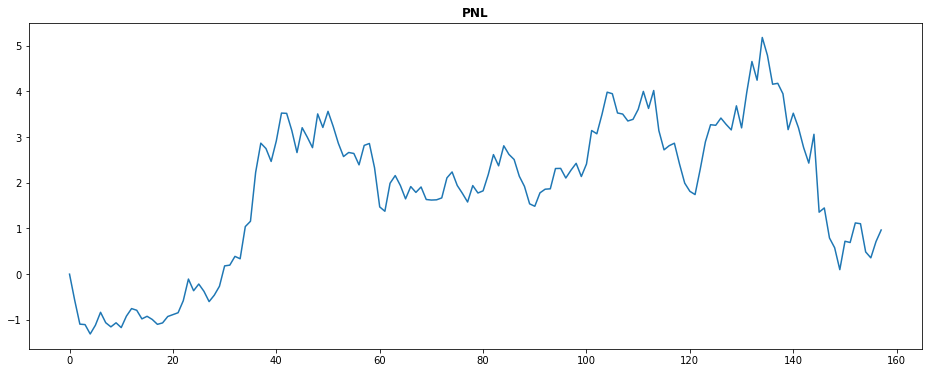

In [142]:
B['pnl'][B.symbol == '1INCH'].plot(figsize=(16, 6))
plt.title("PNL", weight="bold")

plt.show()

In [176]:
C = B.copy()

In [177]:
# отсортируем по времени
C.sort_values(by = 'date', inplace = True)
date = C.date
C.drop(['date'], axis = 1, inplace = True)
C.index = date
C

,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume,symbol,close_pct,pnl
date,,,,,,,,,,,
2018-01-01,13740.9600,13818.550,12750.0000,13452.0000,5.384947e+12,101686,1.102353e+08,5.080436e+07,BTC,2915.043442,13449.8064
2018-01-01,8.5299,8.700,7.8000,8.3706,1.963553e+10,19480,5.154648e+06,2.251361e+06,BNB,39.089080,6.1770
2018-01-01,223.5000,231.190,212.7400,223.9400,2.911334e+11,16653,4.368980e+06,2.090275e+06,LTC,63.987376,221.7464
2018-01-01,733.9900,763.550,716.8000,754.5800,1.726566e+12,72335,3.847616e+07,1.998742e+07,ETH,10.118347,752.3864
2018-01-01,74.8530,80.000,71.0500,79.0390,1.168199e+11,10271,5.719370e+06,3.611816e+06,NEO,23.256253,76.8454
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,0.6340,0.666,0.5850,0.6490,5.257224e+08,13293,2.505076e+06,1.266228e+06,DREP,0.025276,-1.5446
2021-05-31,12.9040,13.997,12.1370,13.5700,1.669679e+10,6881,1.560066e+06,7.863127e+05,UMA,0.053817,11.3764
2021-05-31,9.2870,11.225,8.6760,10.9040,8.059109e+08,33587,6.464907e+06,3.381566e+06,UNFI,0.168828,8.7104


In [178]:
all_dates = C.index.unique()
all_symbols = C.symbol.unique()
D = pd.DataFrame(index = all_dates)
for i in all_symbols:
    D[i] = C['close'].loc[C['symbol'] == i]
D

,BTC,BNB,LTC,ETH,NEO,QTUM,ADA,XRP,EOS,IOTA,...,SLP,BAKE,BURGER,SHIB,ICP,AR,POLS,MDX,MASK,LPT
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,13452.00,8.3706,223.94,754.58,79.039,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,14799.96,8.9490,247.77,852.56,92.990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,14799.91,8.9990,240.80,946.11,104.299,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,14939.39,9.1549,230.15,948.51,99.601,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,17021.36,16.2997,238.98,931.08,89.990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27,38503.15,367.7300,193.76,2755.60,62.893,14.558,1.6538,0.9750,7.0946,1.1749,...,0.2057,4.8961,7.56,0.000009,132.24,15.455,2.100,2.0606,7.680,NaN
2021-05-28,35061.65,325.2600,173.64,2388.80,53.362,11.943,1.4853,0.8802,5.9919,1.0178,...,0.1451,4.2851,6.35,0.000008,113.43,13.858,1.758,1.9750,7.145,27.15
2021-05-29,34467.84,303.9200,163.18,2272.04,50.103,11.159,1.3889,0.8233,5.9614,0.9772,...,0.1309,4.0154,5.98,0.000008,109.70,12.654,1.627,2.0670,6.999,22.31


Удалим криптовалюты, по которым очень мало измерений (<500)

In [179]:
for name in all_symbols:
    if D[name].count() < 500:
        D.drop([name], axis = 1, inplace = True)
D.count()

BTC     1247
BNB     1247
LTC     1247
ETH     1247
NEO     1247
        ... 
BCH      551
TROY     544
VITE     536
FTT      529
OGN      509
Length: 78, dtype: int64

## Получим итоговую таблицу

In [204]:
all_dates = D.index.unique()
all_symbols = D.columns.unique()
X = pd.DataFrame(index = all_dates)
for i in all_symbols:
    X[i + '_close'] = C['close'].loc[C['symbol'] == i]
    X[i + '_MC'] = C['market_cap'].loc[C['symbol'] == i]
    X[i + '_pnl'] = C['pnl'].loc[C['symbol'] == i]
    X[i + '_r'] = C['close_pct'].loc[C['symbol'] == i]
    
X

,BTC_close,BTC_MC,BTC_pnl,BTC_r,BNB_close,BNB_MC,BNB_pnl,BNB_r,LTC_close,LTC_MC,...,VITE_pnl,VITE_r,FTT_close,FTT_MC,FTT_pnl,FTT_r,OGN_close,OGN_MC,OGN_pnl,OGN_r
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,13452.00,5.384947e+12,13449.8064,2915.043442,8.3706,1.963553e+10,6.1770,39.089080,223.94,2.911334e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,14799.96,5.535933e+12,14797.7664,0.100205,8.9490,2.027370e+10,6.7554,0.069099,247.77,3.170348e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,14799.91,5.977944e+12,14797.7164,-0.000003,8.9990,2.065461e+10,6.8054,0.005587,240.80,3.204767e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,14939.39,5.676073e+12,14937.1964,0.009424,9.1549,2.060430e+10,6.9613,0.017324,230.15,2.889483e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,17021.36,6.363962e+12,17019.1664,0.139361,16.2997,2.808771e+10,14.1061,0.780435,238.98,3.159964e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27,38503.15,1.742472e+13,38500.9564,-0.011671,367.7300,1.353735e+12,365.5364,-0.015396,193.76,3.116684e+11,...,-2.08848,-0.014716,36.037,8.134944e+10,33.8434,-0.006479,1.1035,8.717578e+09,-1.0901,-0.079650
2021-05-28,35061.65,1.644770e+13,35059.4564,-0.089382,325.2600,1.251586e+12,323.0664,-0.115492,173.64,2.890513e+11,...,-2.10321,-0.140126,31.833,7.598808e+10,29.6394,-0.116658,0.9277,7.566470e+09,-1.2659,-0.159311
2021-05-29,34467.84,1.585517e+13,34465.6464,-0.016936,303.9200,1.190503e+12,301.7264,-0.065609,163.18,2.772481e+11,...,-2.10865,-0.060184,30.174,7.187710e+10,27.9804,-0.052116,0.8794,6.938885e+09,-1.3142,-0.052064


## Агрегированные индексы

In [205]:
X['aggregate_i_w'] = 0
X['aggregate_i'] = 0
X['MC_total'] = 0
X['Defined'] = X.count(axis = 1)
X = X.fillna(0)
for i in all_symbols:
    X['aggregate_i_w'] = X['aggregate_i_w'] + X[i + '_r'] * X[i + '_MC']
    X['aggregate_i'] = X['aggregate_i'] + X[i + '_r']
    X['MC_total'] = X['MC_total'] + X[i + '_MC']
X['aggregate_i_w'] = X['aggregate_i_w'] / X['MC_total']
X['aggregate_i'] = X['aggregate_i'] / X['Defined']

In [206]:
X

,BTC_close,BTC_MC,BTC_pnl,BTC_r,BNB_close,BNB_MC,BNB_pnl,BNB_r,LTC_close,LTC_MC,...,FTT_pnl,FTT_r,OGN_close,OGN_MC,OGN_pnl,OGN_r,aggregate_i_w,aggregate_i,MC_total,Defined
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,13452.00,5.384947e+12,13449.8064,2915.043442,8.3706,1.963553e+10,6.1770,39.089080,223.94,2.911334e+11,...,0.0000,0.000000,0.0000,0.000000e+00,0.0000,0.000000,2087.375577,132.673674,7.539102e+12,23
2018-01-02,14799.96,5.535933e+12,14797.7664,0.100205,8.9490,2.027370e+10,6.7554,0.069099,247.77,3.170348e+11,...,0.0000,0.000000,0.0000,0.000000e+00,0.0000,0.000000,0.108963,0.025307,7.967955e+12,23
2018-01-03,14799.91,5.977944e+12,14797.7164,-0.000003,8.9990,2.065461e+10,6.8054,0.005587,240.80,3.204767e+11,...,0.0000,0.000000,0.0000,0.000000e+00,0.0000,0.000000,0.027302,0.009078,8.499450e+12,23
2018-01-04,14939.39,5.676073e+12,14937.1964,0.009424,9.1549,2.060430e+10,6.9613,0.017324,230.15,2.889483e+11,...,0.0000,0.000000,0.0000,0.000000e+00,0.0000,0.000000,0.004812,-0.002608,8.246519e+12,23
2018-01-05,17021.36,6.363962e+12,17019.1664,0.139361,16.2997,2.808771e+10,14.1061,0.780435,238.98,3.159964e+11,...,0.0000,0.000000,0.0000,0.000000e+00,0.0000,0.000000,0.094536,0.036665,9.141395e+12,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27,38503.15,1.742472e+13,38500.9564,-0.011671,367.7300,1.353735e+12,365.5364,-0.015396,193.76,3.116684e+11,...,33.8434,-0.006479,1.1035,8.717578e+09,-1.0901,-0.079650,-0.020235,-0.004157,3.386556e+13,315
2021-05-28,35061.65,1.644770e+13,35059.4564,-0.089382,325.2600,1.251586e+12,323.0664,-0.115492,173.64,2.890513e+11,...,29.6394,-0.116658,0.9277,7.566470e+09,-1.2659,-0.159311,-0.103676,-0.031487,3.161915e+13,315
2021-05-29,34467.84,1.585517e+13,34465.6464,-0.016936,303.9200,1.190503e+12,301.7264,-0.065609,163.18,2.772481e+11,...,27.9804,-0.052116,0.8794,6.938885e+09,-1.3142,-0.052064,-0.033617,-0.010917,3.017059e+13,315
